<h1>COLLISION PREDICTION</h1>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
!wget -O dataCollisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-02 13:05:07--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘dataCollisions.csv’

100%[======================================>] 73,917,638  33.3MB/s   in 2.1s   

2020-09-02 13:05:10 (33.3 MB/s) - ‘dataCollisions.csv’ saved [73917638/73917638]



In [3]:
df= pd.read_csv('dataCollisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
df['INCDATE']=df[['INCDATE']].astype('datetime64[ns]')
df['INCDATE']=pd.to_datetime(df['INCDATE'])
df['day_of_week']=df['INCDATE'].dt.dayofweek
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,day_of_week
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,3
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,4
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,2


In [293]:
collisionDf=df[['INTKEY', 'ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT','JUNCTIONTYPE', 'SPEEDING', 'ST_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'day_of_week']]
collisionDf

,INTKEY,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,SPEEDING,ST_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,day_of_week
0,37475.0,Intersection,2,Angles,2,2,At Intersection (intersection related),NaN,10,N,Overcast,Wet,Daylight,2
1,NaN,Block,1,Sideswipe,2,2,Mid-Block (not related to intersection),NaN,11,0,Raining,Wet,Dark - Street Lights On,2
2,NaN,Block,1,Parked Car,4,3,Mid-Block (not related to intersection),NaN,32,0,Overcast,Dry,Daylight,3
3,NaN,Block,1,Other,3,3,Mid-Block (not related to intersection),NaN,23,N,Clear,Dry,Daylight,4
4,34387.0,Intersection,2,Angles,2,2,At Intersection (intersection related),NaN,10,0,Raining,Wet,Daylight,2
5,36974.0,Intersection,1,Angles,2,2,At Intersection (intersection related),NaN,10,N,Clear,Dry,Daylight,5
6,29510.0,Intersection,1,Angles,2,2,At Intersection (intersection related),NaN,10,0,Raining,Wet,Daylight,1
7,29745.0,Intersection,2,Cycles,3,1,At Intersection (intersection related),NaN,5,N,Clear,Dry,Daylight,2
8,NaN,Block,1,Parked Car,2,2,Mid-Block (not related to intersection),NaN,32,0,Clear,Dry,Daylight,3
9,34679.0,Intersection,2,Angles,2,2,At Intersection (intersection related),NaN,10,0,Clear,Dry,Daylight,0


In [300]:
collisionDf = collisionDf.replace([np.inf, -np.inf], np.nan)
collisionDf.drop(collisionDf[collisionDf['ST_COLCODE'] == ' '].index, inplace = True)
collisionDf.drop(collisionDf[collisionDf['WEATHER']=='nan'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['WEATHER']=='Unknown'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['LIGHTCOND']=='nan'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['LIGHTCOND']=='Unknown'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['JUNCTIONTYPE']=='nan'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['JUNCTIONTYPE']=='Unknown'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['ROADCOND']=='nan'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['ROADCOND']=='Unknown'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['COLLISIONTYPE']=='nan'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['COLLISIONTYPE']=='Unknown'].index, inplace=True)
collisionDf.drop(collisionDf[collisionDf['ST_COLCODE']=='nan'].index, inplace=True)

collisionDf['ST_COLCODE']=collisionDf[['ST_COLCODE']].astype('float')

collisionDf['COLLISIONTYPE']=collisionDf['COLLISIONTYPE'].astype(str)
collisionDf['JUNCTIONTYPE']=collisionDf['JUNCTIONTYPE'].astype(str)
collisionDf['WEATHER']=collisionDf['WEATHER'].astype(str)
collisionDf['ROADCOND']=collisionDf['ROADCOND'].astype(str)
collisionDf['LIGHTCOND']=collisionDf['LIGHTCOND'].astype(str)

collisionDf.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


INTKEY           float64
ADDRTYPE          object
SEVERITYCODE       int64
COLLISIONTYPE     object
PERSONCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
SPEEDING         float64
ST_COLCODE       float64
UNDERINFL        float64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
day_of_week        int64
dtype: object

In [301]:
collisionDf['COLLISIONTYPE'].dropna()
collisionDf['JUNCTIONTYPE'].dropna()
collisionDf['WEATHER'].dropna()
collisionDf['ROADCOND'].dropna()
collisionDf['LIGHTCOND'].dropna()
collisionDf['ST_COLCODE'].dropna()


collisionDf['SPEEDING'].replace('NaN', "0", inplace=True)
collisionDf['SPEEDING'].fillna('0', inplace=True)
collisionDf['SPEEDING'].replace('N', 0, inplace=True)
collisionDf['SPEEDING'].replace('Y', 1, inplace=True)

collisionDf['UNDERINFL'].fillna('0', inplace=True)
collisionDf['UNDERINFL'].replace('N', 0, inplace=True)
collisionDf['UNDERINFL'].replace('Y', 1, inplace=True)

collisionDf['UNDERINFL']=collisionDf[['UNDERINFL']].astype('float')
collisionDf['SPEEDING']=collisionDf[['SPEEDING']].astype('float')

collisionDf['SPEEDING'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: SPEEDING, dtype: float64

In [302]:
collisionDf

,INTKEY,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,SPEEDING,ST_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,day_of_week
0,37475.0,Intersection,2,Angles,2,2,At Intersection (intersection related),0.0,10.0,0.0,Overcast,Wet,Daylight,2
1,NaN,Block,1,Sideswipe,2,2,Mid-Block (not related to intersection),0.0,11.0,0.0,Raining,Wet,Dark - Street Lights On,2
2,NaN,Block,1,Parked Car,4,3,Mid-Block (not related to intersection),0.0,32.0,0.0,Overcast,Dry,Daylight,3
3,NaN,Block,1,Other,3,3,Mid-Block (not related to intersection),0.0,23.0,0.0,Clear,Dry,Daylight,4
4,34387.0,Intersection,2,Angles,2,2,At Intersection (intersection related),0.0,10.0,0.0,Raining,Wet,Daylight,2
5,36974.0,Intersection,1,Angles,2,2,At Intersection (intersection related),0.0,10.0,0.0,Clear,Dry,Daylight,5
6,29510.0,Intersection,1,Angles,2,2,At Intersection (intersection related),0.0,10.0,0.0,Raining,Wet,Daylight,1
7,29745.0,Intersection,2,Cycles,3,1,At Intersection (intersection related),0.0,5.0,0.0,Clear,Dry,Daylight,2
8,NaN,Block,1,Parked Car,2,2,Mid-Block (not related to intersection),0.0,32.0,0.0,Clear,Dry,Daylight,3
9,34679.0,Intersection,2,Angles,2,2,At Intersection (intersection related),0.0,10.0,0.0,Clear,Dry,Daylight,0


In [303]:
import seaborn as sns
import matplotlib.pyplot as plt

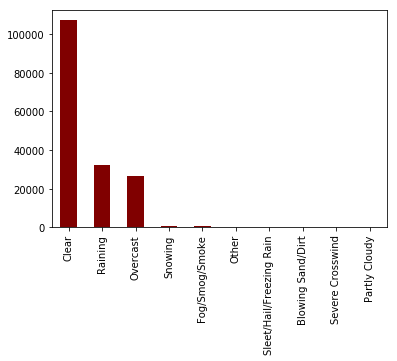

In [304]:
collisionDf['WEATHER'].value_counts().plot(kind='bar', color='maroon')

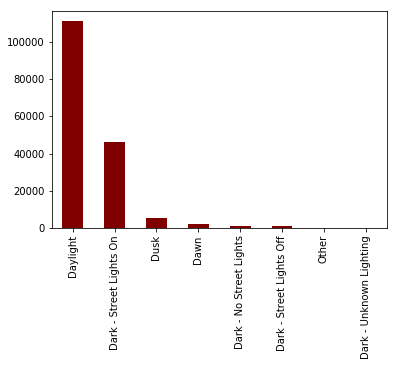

In [305]:
collisionDf['LIGHTCOND'].value_counts().plot(kind='bar', color='maroon')

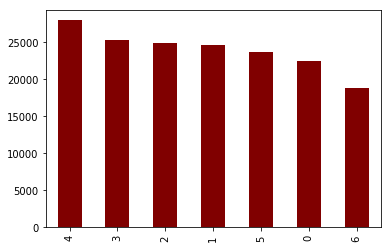

In [306]:
collisionDf['day_of_week'].value_counts().plot(kind='bar', color='maroon')

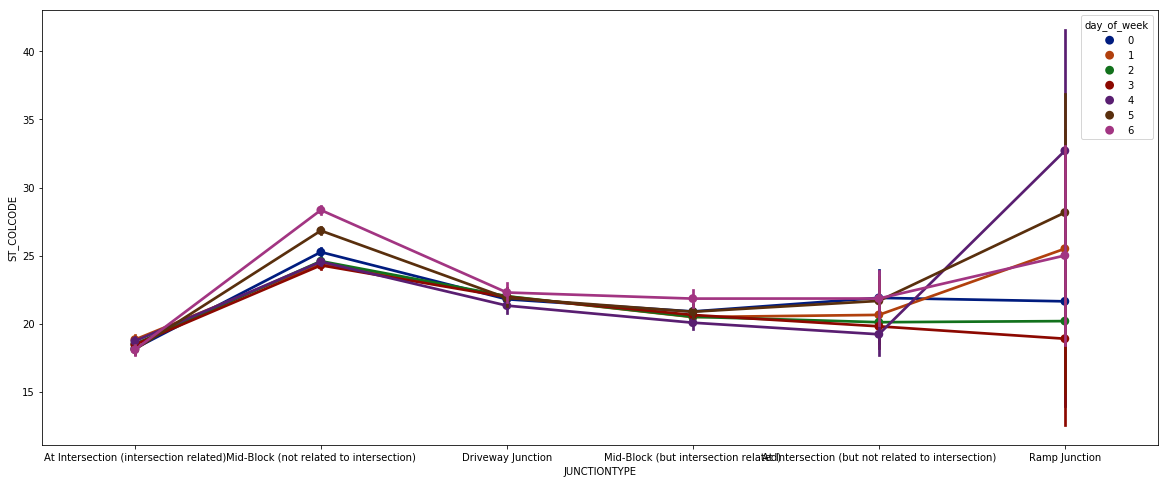

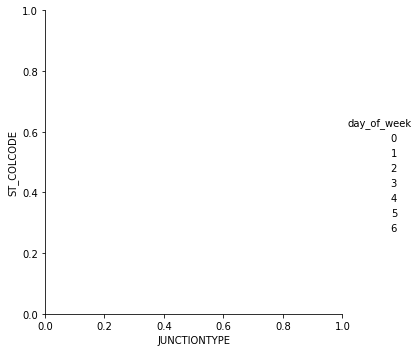

In [307]:
fig_dims=(20, 8)
fig, ax=plt.subplots(figsize=fig_dims)
sns.catplot(x='JUNCTIONTYPE', y='ST_COLCODE', hue='day_of_week', palette="dark", kind="point", ax=ax, data=collisionDf)

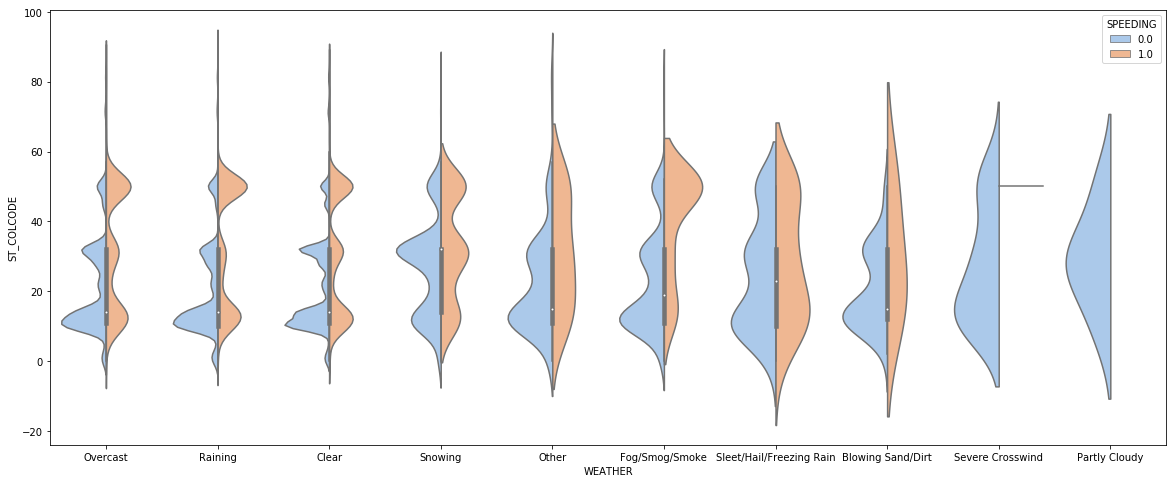

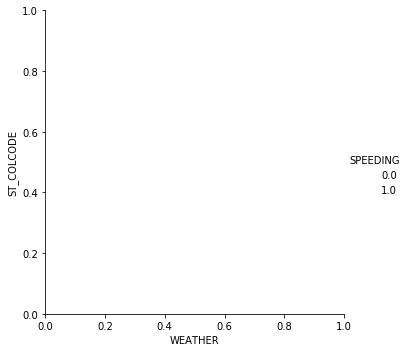

In [309]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x='WEATHER', y='ST_COLCODE', data=collisionDf, hue="SPEEDING", kind='violin', split=True, palette="pastel", ax=ax)

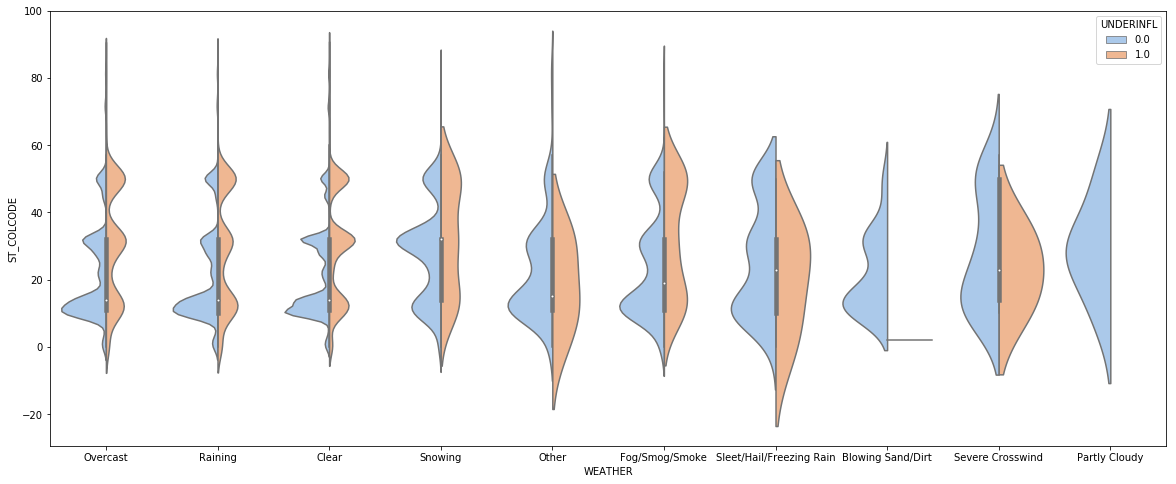

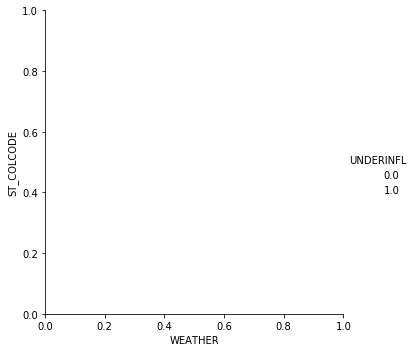

In [310]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x='WEATHER', y='ST_COLCODE', data=collisionDf, hue="UNDERINFL", kind='violin', split=True, palette="pastel", ax=ax)

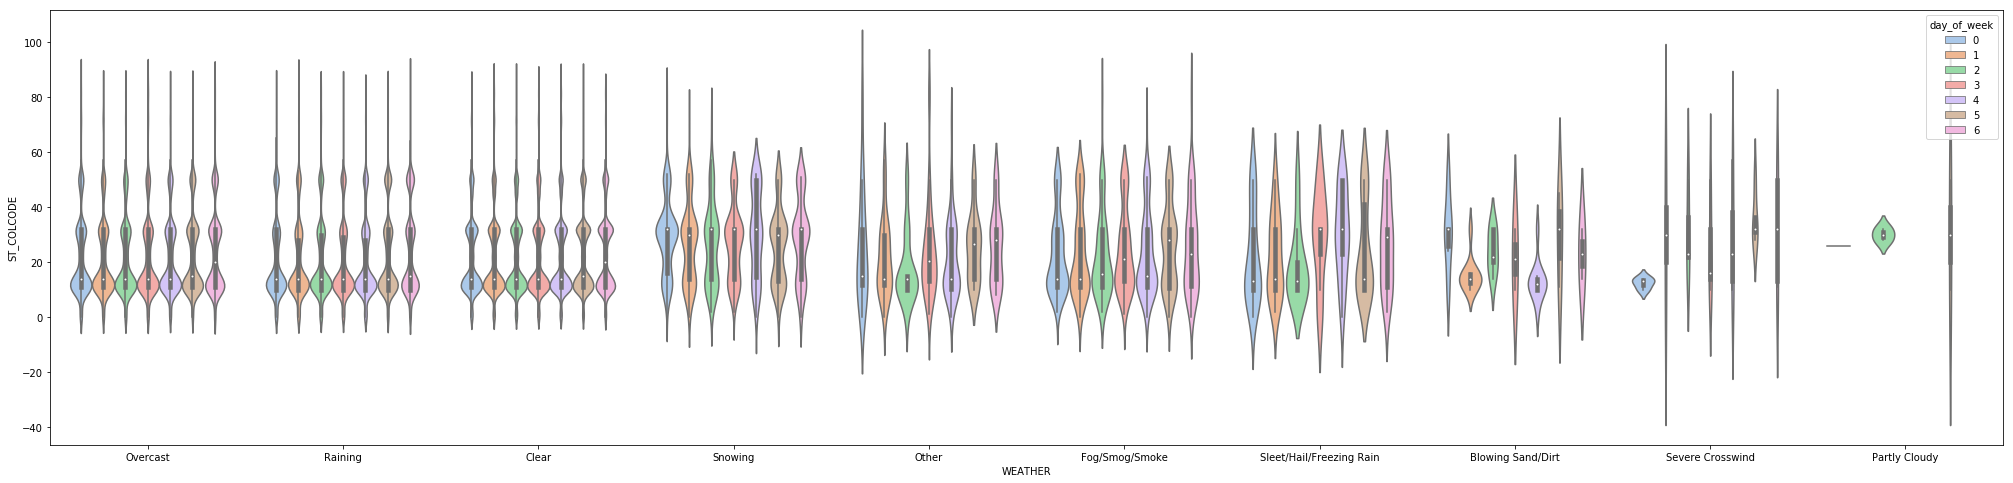

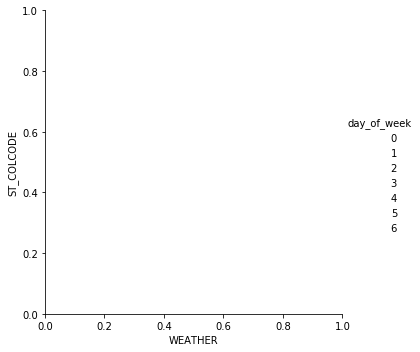

In [311]:
fig_dims = (35, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x='WEATHER', y='ST_COLCODE', data=collisionDf, hue="day_of_week", kind='violin', palette="pastel", ax=ax)

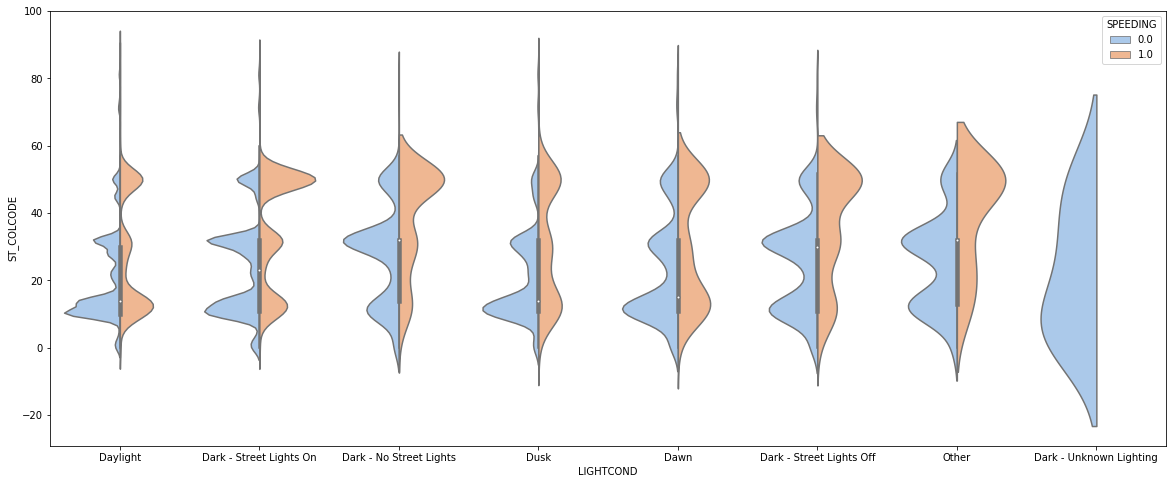

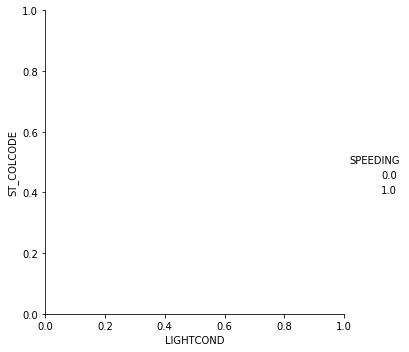

In [312]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x='LIGHTCOND', y='ST_COLCODE',hue="SPEEDING", kind='violin', split=True, palette="pastel", data=collisionDf, ax=ax)

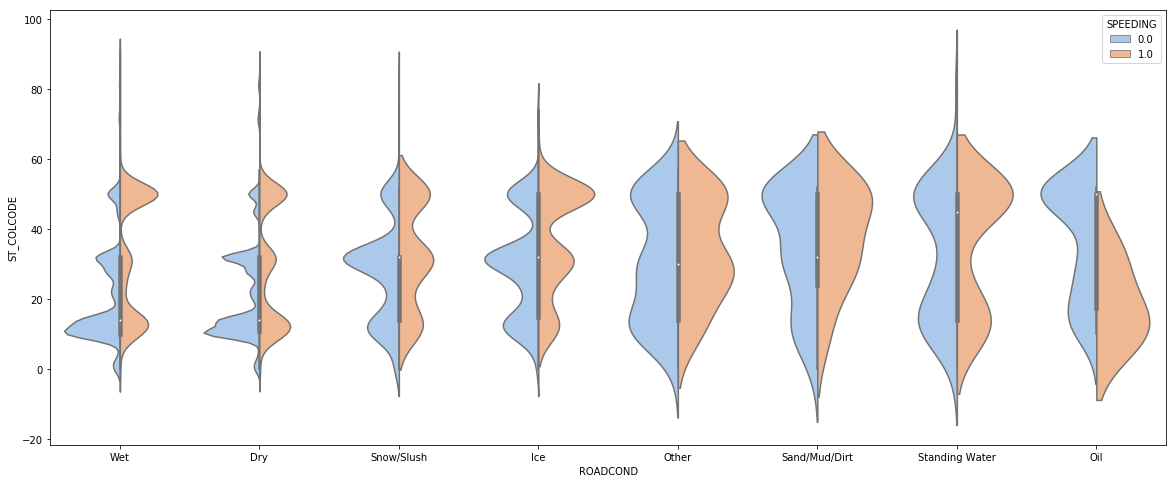

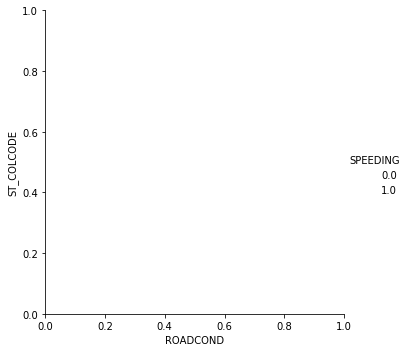

In [313]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x='ROADCOND', y='ST_COLCODE',hue="SPEEDING", palette="pastel", kind='violin', split=True, data=collisionDf, ax=ax)

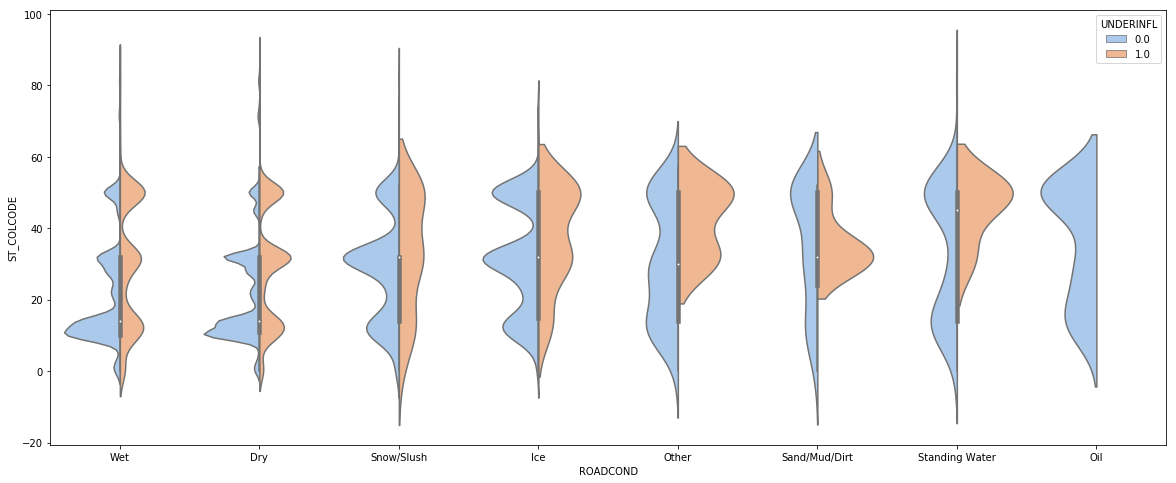

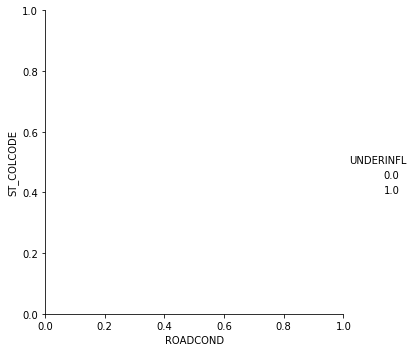

In [314]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x='ROADCOND', y='ST_COLCODE', hue="UNDERINFL", palette="pastel", kind='violin', split=True, data=collisionDf, ax=ax)

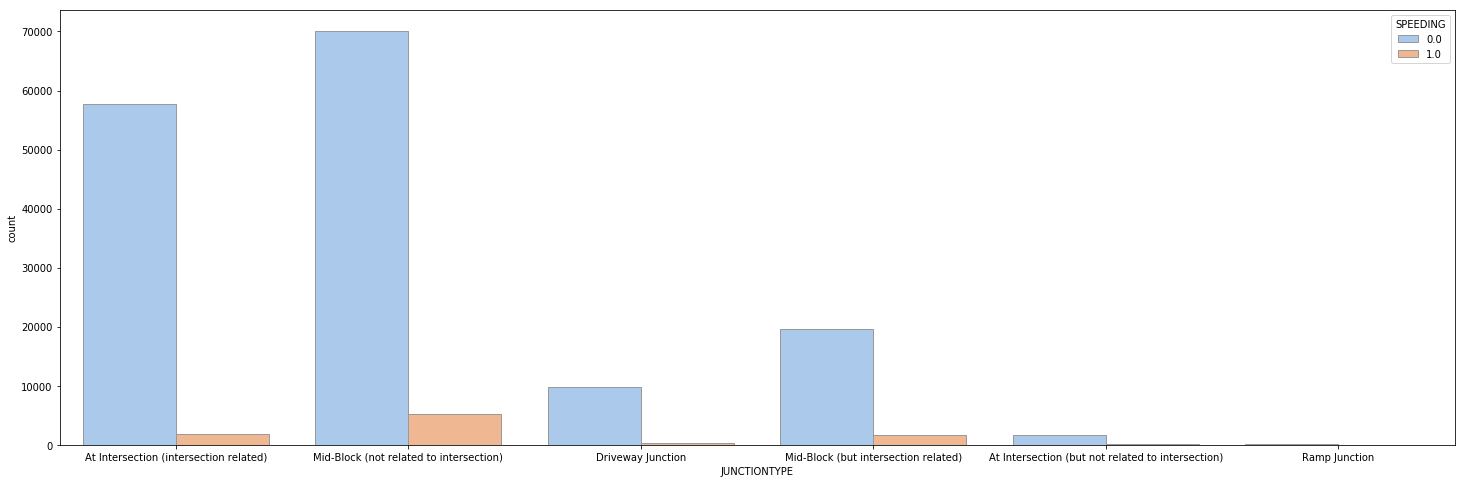

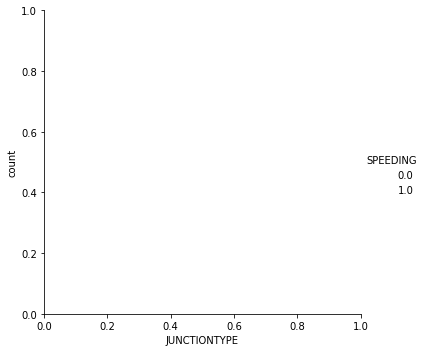

In [315]:
fig_dims=(25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x='JUNCTIONTYPE',hue="SPEEDING", palette="pastel", edgecolor=".6", data=collisionDf, ax=ax, kind="count")

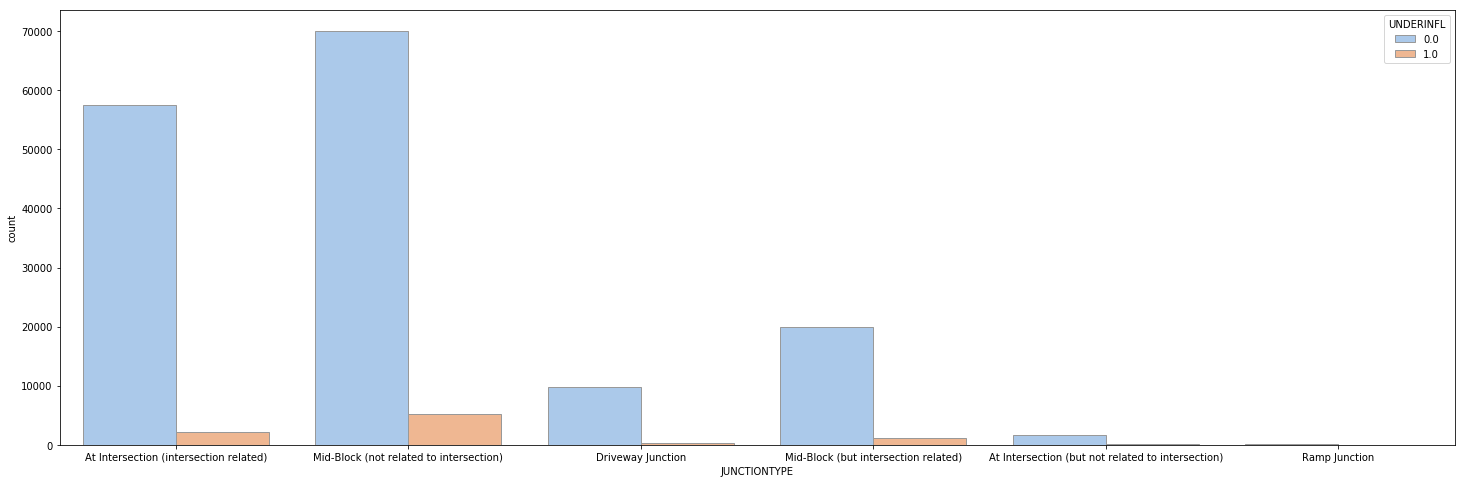

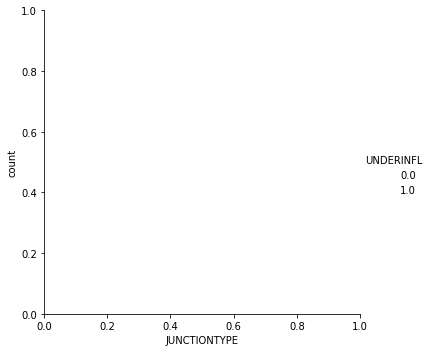

In [316]:
fig_dims=(25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x='JUNCTIONTYPE',hue="UNDERINFL", palette="pastel", edgecolor=".6", data=collisionDf, ax=ax, kind="count")

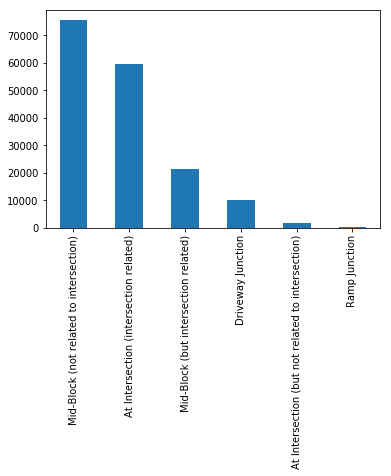

In [317]:
a=collisionDf['JUNCTIONTYPE'].value_counts()
a.plot(kind='bar')

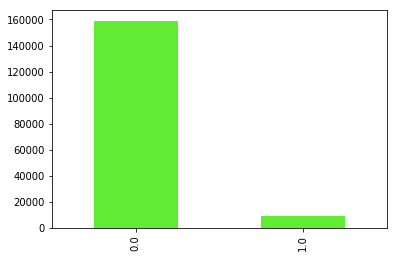

In [318]:
collisionDf["SPEEDING"].value_counts().plot(kind='bar', color='#61eb34')

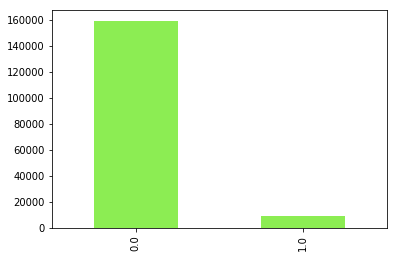

In [319]:
collisionDf["UNDERINFL"].value_counts().plot(kind='bar', color='#8ced53')

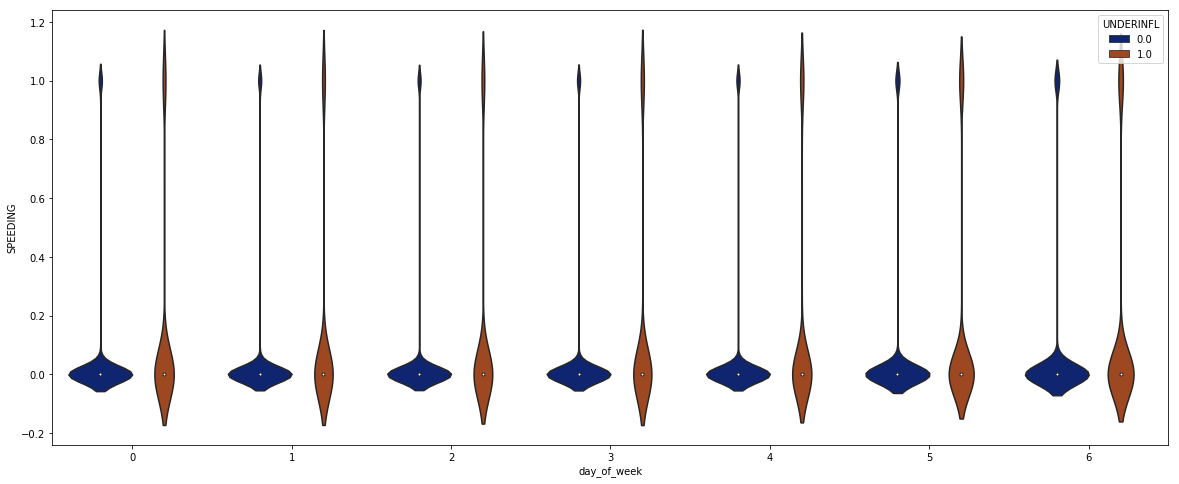

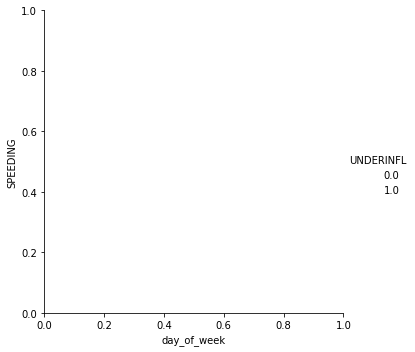

In [320]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.catplot(x='day_of_week', y='SPEEDING', hue="UNDERINFL", palette="dark", kind='violin',  data=collisionDf, ax=ax)

INTKEY            True
ADDRTYPE          True
SEVERITYCODE     False
COLLISIONTYPE    False
PERSONCOUNT      False
VEHCOUNT         False
JUNCTIONTYPE     False
SPEEDING         False
ST_COLCODE       False
UNDERINFL        False
WEATHER          False
ROADCOND         False
LIGHTCOND        False
day_of_week      False
dtype: bool

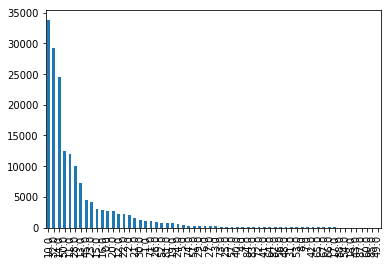

In [322]:
collisionDf['ST_COLCODE'].value_counts().plot(kind='bar')
collisionDf.isnull().any()

In [323]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

le.fit(collisionDf['COLLISIONTYPE'].astype(str))
collisionDf["COLLISIONTYPE"]=le.transform(collisionDf['COLLISIONTYPE'])
le.fit(collisionDf['JUNCTIONTYPE'].astype(str))
collisionDf['JUNCTIONTYPE']=le.transform(collisionDf['JUNCTIONTYPE'])
le.fit(collisionDf['WEATHER'].astype(str))
collisionDf['WEATHER']=le.transform(collisionDf['WEATHER'])
le.fit(collisionDf['ROADCOND'].astype(str))
collisionDf['ROADCOND']=le.transform(collisionDf['ROADCOND'])
le.fit(collisionDf['LIGHTCOND'].astype(str))
collisionDf['LIGHTCOND']=le.transform(collisionDf['LIGHTCOND'])
collisionDf.head()

,INTKEY,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,SPEEDING,ST_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,day_of_week
0,37475.0,Intersection,2,0,2,2,1,0.0,10.0,0.0,4,7,5,2
1,NaN,Block,1,9,2,2,4,0.0,11.0,0.0,6,7,2,2
2,NaN,Block,1,5,4,3,4,0.0,32.0,0.0,4,0,5,3
3,NaN,Block,1,4,3,3,4,0.0,23.0,0.0,1,0,5,4
4,34387.0,Intersection,2,0,2,2,1,0.0,10.0,0.0,6,7,5,2


In [324]:
X=collisionDf[['COLLISIONTYPE', 'SPEEDING', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'day_of_week']].values
X[0:5]

array([[0., 0., 0., 4., 7., 5., 2.],
       [9., 0., 0., 6., 7., 2., 2.],
       [5., 0., 0., 4., 0., 5., 3.],
       [4., 0., 0., 1., 0., 5., 4.],
       [0., 0., 0., 6., 7., 5., 2.]])

In [325]:
# X['COLLISIONTYPE'].value_counts()
# X['SPEEDING'].value_counts()
# X['UNDERINFL'].value_counts()
# X['WEATHER'].value_counts()
# X['ROADCOND'].value_counts()
# X['LIGHTCOND'].value_counts()
# X['day_of_week'].value_counts()
# X.isnull().any()

In [326]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.53268165, -0.23850253, -0.23657263,  0.72304776,  1.61844344,
         0.60359461, -0.49075208],
       [ 1.57619048, -0.23850253, -0.23657263,  1.67860896,  1.61844344,
        -1.4794138 , -0.49075208],
       [ 0.19446953, -0.23850253, -0.23657263,  0.72304776, -0.6246923 ,
         0.60359461,  0.03054283],
       [-0.1509607 , -0.23850253, -0.23657263, -0.71029405, -0.6246923 ,
         0.60359461,  0.55183774],
       [-1.53268165, -0.23850253, -0.23657263,  1.67860896,  1.61844344,
         0.60359461, -0.49075208]])

In [327]:
y_st_colcode=collisionDf['ST_COLCODE'].values.astype(float)
y_veh_count=collisionDf['VEHCOUNT'].values.astype(float)

y_st_colcode[0:5]

array([10., 11., 32., 23., 10.])

In [328]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y_st_colcode, test_size=0.25, random_state=4)
print("x train shape: ", x_train.shape, 'x test shape: ', x_test.shape)
print('y train shape: ', y_train.shape, 'y test shape: ', y_test.shape)

x train shape:  (125985, 7) x test shape:  (41995, 7)
y train shape:  (125985,) y test shape:  (41995,)


In [329]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

In [333]:
k = 48
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat=neigh.predict(x_test)
f1_score(y_test, yhat, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.682915180731736

In [334]:
np.isnan(y_train).any()

False

In [336]:
Ks = 150
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1]=f1_score(y_test, yhat, average='weighted')

# mean_acc

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/pyth

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

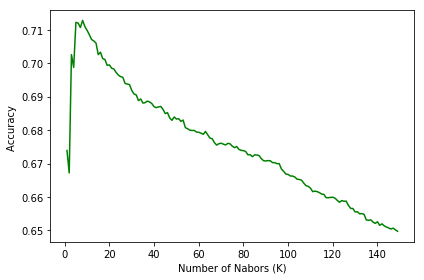

In [337]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [338]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7127801318009379 with k= 8


In [339]:
from sklearn.tree import DecisionTreeClassifier

In [340]:
training_X=collisionDf[['COLLISIONTYPE', 'JUNCTIONTYPE', 'SPEEDING', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'day_of_week']].values
y=collisionDf['ST_COLCODE']

In [341]:
dt_x_train, dt_x_test, dt_y_train, dt_y_test=train_test_split(training_X, y, test_size=0.3, random_state=3)

In [342]:
collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
collisionTree.fit(dt_x_train, dt_y_train )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [343]:
predTree = collisionTree.predict(dt_x_test)

In [345]:
f1_score(dt_y_test, predTree, average='weighted' )

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7458948340424516

In [352]:
Ks = 100
f1Score = np.zeros((Ks-1))
for n in range(1,Ks):
    
    collisionTree = DecisionTreeClassifier(criterion="gini", max_depth = n)
    collisionTree.fit(dt_x_train, dt_y_train )
    predTree = collisionTree.predict(dt_x_test)
    f1Score[n-1]=f1_score(dt_y_test, predTree, average='weighted')

# f1Score

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

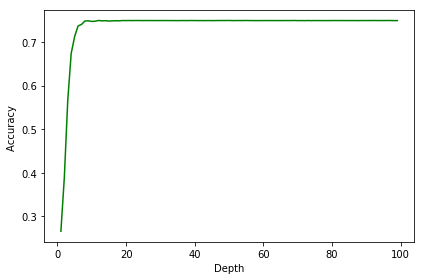

In [353]:
plt.plot(range(1,Ks),f1Score,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

In [354]:
print( "The best accuracy was with", f1Score.max(), "with k=", f1Score.argmax()+1)

The best accuracy was with 0.749282047876135 with k= 12


In [355]:
from sklearn import svm 

In [356]:
clf = svm.SVC(kernel='rbf')
clf.fit(dt_x_train, dt_y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [357]:
SVMyhat = clf.predict(dt_x_test)
f1_score(dt_y_test, SVMyhat, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7382545808889857